<a href="https://colab.research.google.com/github/HarshKapr/Cloud/blob/main/group_assignment_sig742_pk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instal the necessary libraries

In [ ]:

# Install necessary libraries
!pip install pyspark pandas matplotlib seaborn
# Import required libraries
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Initialize Spark session
spark = SparkSession.builder.appName("TransactionAnalysis").getOrCreate()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=03e180841c49884325a86c37253927a92df5ace101c3120853e009bdeb718ddc
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


1.1.1 For the ’NA’ in CustomerNo columns, change it to ’-1’.

In [ ]:
# Read the data
data_path = "/content/transactionrecord"
df = spark.read.csv(data_path, header=True, inferSchema=True)
# Replace 'NA' in CustomerNo with '-1'
df = df.withColumn("CustomerNo", when(df["CustomerNo"] == "NA", "-1").otherwise(df["CustomerNo"]))
# Show the updated DataFrame
df.show(10)

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|
|       581475|12/9/2019|    23272|Tree T-Light Hold...|             0ca|10.65|      12|     13069|United Kingdom|
|       581475|12/9/2019|    23239|Set Of 4 Knick Kn...|             0ca|11.94|       6|     13069|United Kingdom|
|       581475|12/9/2019|    21705|Bag 500g Swirly M...|             0ca|10.65| 

In [ ]:
from pyspark.sql.functions import when

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Show the count of the DataFrame
row_count = df.count()

print(f"Total number of rows in the DataFrame: {row_count}")

Total number of rows in the DataFrame: 536350


In [ ]:
df.filter(col("CustomerNo") == -1)
df.show()

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|
|       581475|12/9/2019|    23272|Tree T-Light Hold...|             0ca|10.65|      12|     13069|United Kingdom|
|       581475|12/9/2019|    23239|Set Of 4 Knick Kn...|             0ca|11.94|       6|     13069|United Kingdom|
|       581475|12/9/2019|    21705|Bag 500g Swirly M...|             0ca|10.65| 

1.1.2 Process the text in productName column, only alphabet characters left, and save the processed result to a new column productName_process and show the first 5 rows.

In [ ]:
# Remove non-alphabet characters from productName
df = df.withColumn("productName_process", regexp_replace(col("productName"), "[^A-Za-z]", ""))
# Show the first 5 rows with the new column
df.select("productName", "productName_process").show(5)

+--------------------+--------------------+
|         productName| productName_process|
+--------------------+--------------------+
|Set Of 2 Wooden M...|SetOfWoodenMarket...|
|Christmas Star Wi...|ChristmasStarWish...|
|Storage Tin Vinta...|StorageTinVintage...|
|Tree T-Light Hold...|TreeTLightHolderW...|
|Set Of 4 Knick Kn...|SetOfKnickKnackTi...|
+--------------------+--------------------+
only showing top 5 rows



1.2.1 Find out the revenue on each transaction date. In order to achieve the above, some wrangling work is required to be done: 1.2.1 Using pyspark to calculate the revenue (price * Quantity) and save as float format in pyspark dataframe to show the top 5 rows.

In [ ]:
# Calculate revenue (price * Quantity)
df = df.withColumn("Revenue", (df["price"] * df["Quantity"]).cast("float"))
# Show the top 5 rows
df.select("Date", "CustomerNo", "Revenue").show(5)

+---------+----------+-------+
|     Date|CustomerNo|Revenue|
+---------+----------+-------+
|12/9/2019|     17490| 257.64|
|12/9/2019|     13069|  383.4|
|12/9/2019|     13069| 138.36|
|12/9/2019|     13069|  127.8|
|12/9/2019|     13069|  71.64|
+---------+----------+-------+
only showing top 5 rows



1.2.2 Transform the pyspark dataframe to pandas dataframe (named as df) and create the column transaction_date with date format according to Date. Print your df pandas dataframe with top 5 rows after creating the column transaction_date.

In [ ]:
# Convert to pandas dataframe
pandas_df = df.toPandas()
# Create transaction_date column
pandas_df['transaction_date'] = pd.to_datetime(pandas_df['Date'])
# Show the top 5 rows
pandas_df.head()

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,productName_process,Revenue,transaction_date
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,SetOfWoodenMarketCrates,257.640015,2019-12-09
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,ChristmasStarWishListChalkboard,383.399994,2019-12-09
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,StorageTinVintageLeaf,138.360001,2019-12-09
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,TreeTLightHolderWillieWinkie,127.800003,2019-12-09
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,SetOfKnickKnackTinsPoppies,71.639999,2019-12-09


1.2.3 Plot the sum of revenue on transaction_date in a line plot and find out any immediate pattern / insight?

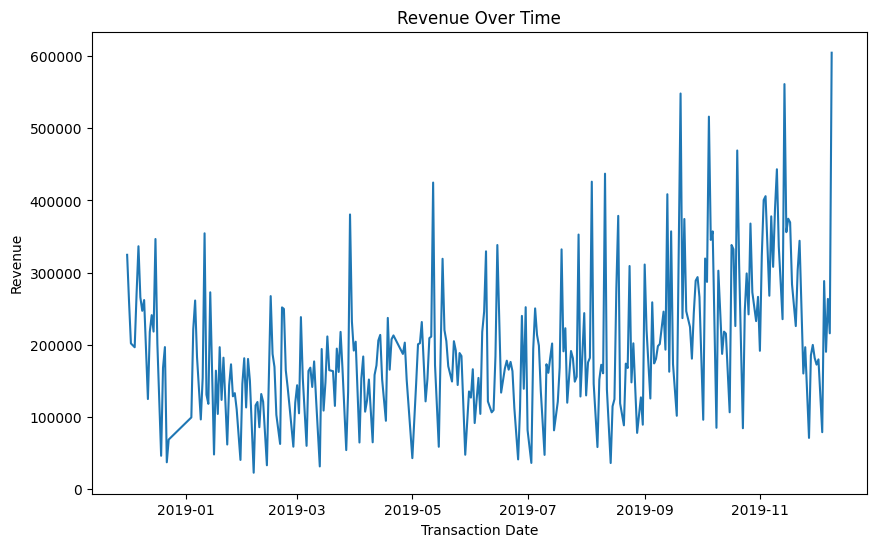

In [ ]:
# Group by transaction_date and calculate total revenue
revenue_by_date = pandas_df.groupby("transaction_date")["Revenue"].sum().reset_index()
# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=revenue_by_date, x="transaction_date", y="Revenue")
plt.title("Revenue Over Time")
plt.xlabel("Transaction Date")
plt.ylabel("Revenue")
plt.show()

Let’s continue to analyse on the transaction_date vs revenue.

1.3.1 Determine which workday (day of the week), generates the most sales (plotting the results in a line chart with workday on averaged revenues)

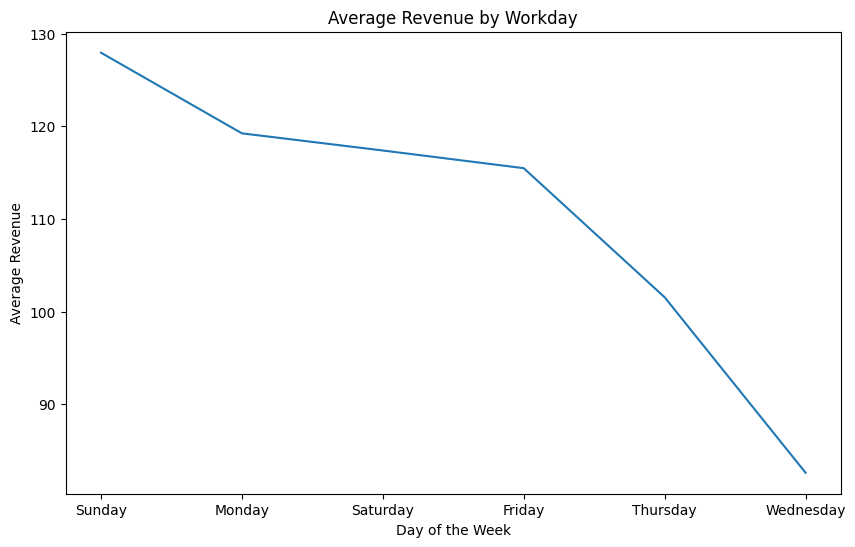

In [ ]:
# Add a column for day of the week
pandas_df['workday'] = pandas_df['transaction_date'].dt.day_name()
# Calculate average revenue by workday
avg_revenue_by_workday = pandas_df.groupby("workday")["Revenue"].mean().sort_values(ascending=False)
# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_revenue_by_workday)
plt.title("Average Revenue by Workday")
plt.xlabel("Day of the Week")
plt.ylabel("Average Revenue")
plt.show()

1.3.2 Identify the name of product (column productName_process) that contributes the highest revenue on ‘that workday’ (you need to find out from 1.3.1) and the name of product (column productName_process) that has the highest sales volume (sum of the Quantity), no need to remove negative quantity transactions.) on ‘that workday’ (you need to find out from 1.3.1).

In [ ]:
# Identify the top workday (the first day in sorted avg_revenue_by_workday)
top_workday = avg_revenue_by_workday.index[0]
# Filter data for the top workday
top_workday_data = pandas_df[pandas_df['workday'] == top_workday]
# Identify the product with the highest revenue on that day
top_revenue_product = top_workday_data.groupby("productName_process")["Revenue"].sum().idxmax()
# Identify the product with the highest sales volume on that day
top_sales_volume_product = top_workday_data.groupby("productName_process")["Quantity"].sum().idxmax()
print(f"Product with highest revenue on {top_workday}: {top_revenue_product}")
print(f"Product with highest sales volume on {top_workday}: {top_sales_volume_product}")

Product with highest revenue on Sunday: WorldWarGlidersAsstdDesigns
Product with highest sales volume on Sunday: WorldWarGlidersAsstdDesigns


1.3.3 Please provide two plots showing the top 5 products that contribute the highest revenues in general and top 5 products that have the highest sales volumes in general.

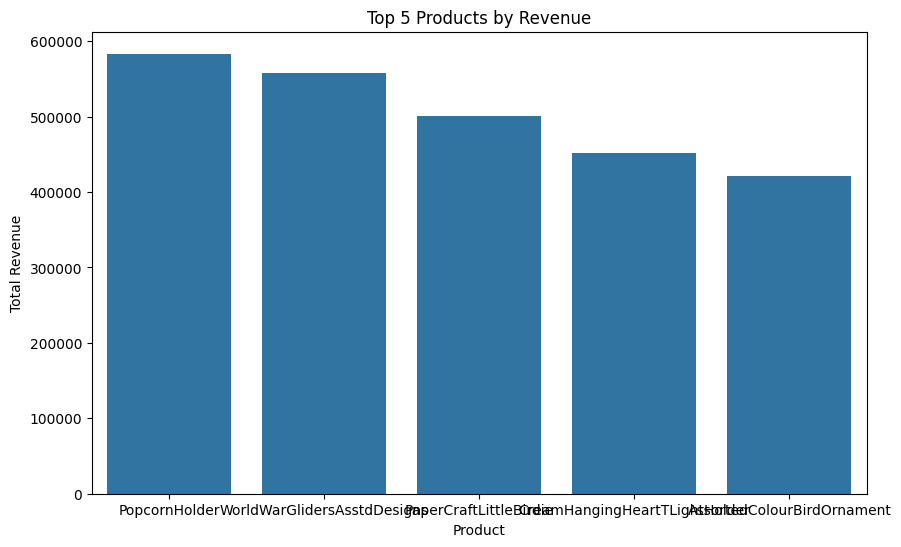

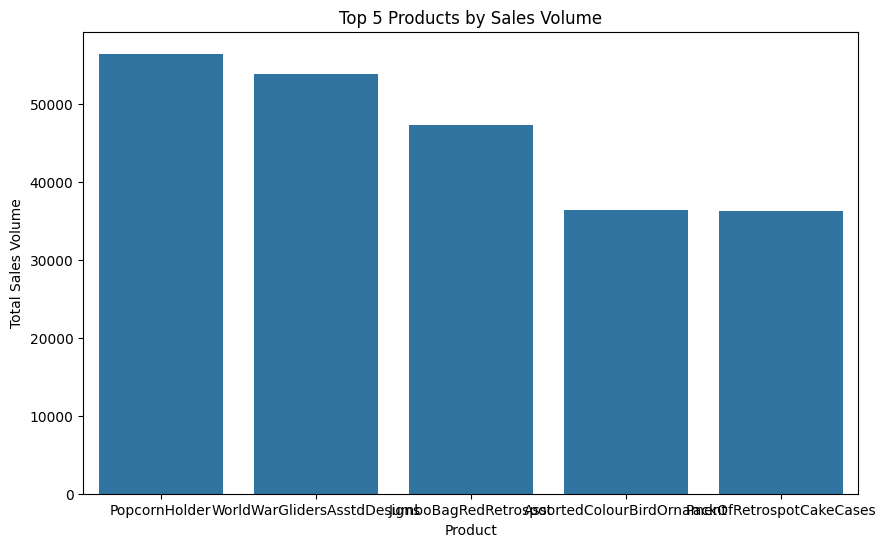

In [ ]:
# Top 5 products by revenue
top5_revenue_products = pandas_df.groupby("productName_process")["Revenue"].sum().nlargest(5)
# Top 5 products by sales volume
top5_sales_volume_products = pandas_df.groupby("productName_process")["Quantity"].sum().nlargest(5)
# Plotting top 5 products by revenue
plt.figure(figsize=(10, 6))
sns.barplot(x=top5_revenue_products.index, y=top5_revenue_products.values)
plt.title("Top 5 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.show()
# Plotting top 5 products by sales volume
plt.figure(figsize=(10, 6))
sns.barplot(x=top5_sales_volume_products.index, y=top5_sales_volume_products.values)
plt.title("Top 5 Products by Sales Volume")
plt.xlabel("Product")
plt.ylabel("Total Sales Volume")
plt.show()

1.4 Which country generates the highest revenue? Additionally, identify the month in that country that has the highest revenue.

Country with the highest revenue: United Kingdom
Month with the highest revenue in United Kingdom: 11.0


<ipython-input-12-c27d456fdf23>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_country_data["Month"] = top_country_data["transaction_date"].dt.month


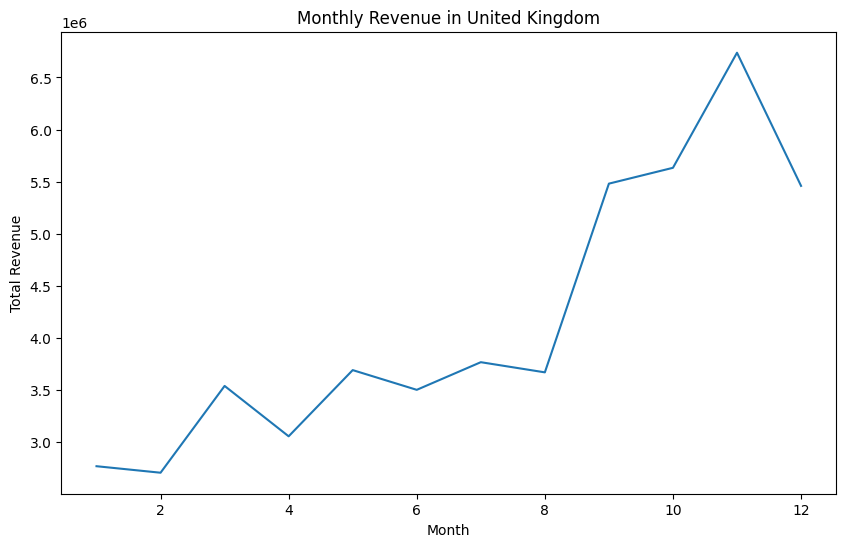

In [ ]:
#Group by country and calculate total revenue
revenue_by_country = pandas_df.groupby("Country")["Revenue"].sum().reset_index()
# Find the country with the highest revenue
top_country = revenue_by_country.loc[revenue_by_country["Revenue"].idxmax()]["Country"]
# Filter data for the top country
top_country_data = pandas_df[pandas_df["Country"] == top_country]
# Add a month column to the data
top_country_data["Month"] = top_country_data["transaction_date"].dt.month
# Group by month and calculate total revenue
revenue_by_month = top_country_data.groupby("Month")["Revenue"].sum().reset_index()
# Find the month with the highest revenue
top_month = revenue_by_month.loc[revenue_by_month["Revenue"].idxmax()]["Month"]
print(f"Country with the highest revenue: {top_country}")
print(f"Month with the highest revenue in {top_country}: {top_month}")
# Plotting the revenue by month
plt.figure(figsize=(10, 6))
sns.lineplot(data=revenue_by_month, x="Month", y="Revenue")
plt.title(f"Monthly Revenue in {top_country}")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()

1.5 Let’s do some analysis on the CustomerNo and their transactions. Determine the shopping frequency of customers to identify who shops most frequently (find out the highest distinct count of transactionNo on customer level, be careful with those transactions that is not for shopping – filter those transaction quantity <= 0). Also, find out what products (column productName_process) ‘this customer’ typically buys based on the Quantity of products purchased.

In [ ]:
# Filter out transactions with non-positive quantities
valid_transactions = pandas_df[pandas_df["Quantity"] > 0]
# Determine shopping frequency by counting distinct transactionNo per customer
shopping_frequency = valid_transactions.groupby("CustomerNo")["TransactionNo"].nunique()
# Identify the most frequent shopper
most_frequent_shopper = shopping_frequency.idxmax()
# Products typically bought by the most frequent shopper
products_by_shopper = valid_transactions[valid_transactions["CustomerNo"] == most_frequent_shopper]
top_products_by_shopper = products_by_shopper.groupby("productName_process")["Quantity"].sum().nlargest(5)
print(f"Most frequent shopper: CustomerNo {most_frequent_shopper}")
print("Top products bought by this shopper:")
print(top_products_by_shopper)

Most frequent shopper: CustomerNo 12748
Top products bought by this shopper:
productName_process
VictorianMetalPostcardSpring     595
WorldWarGlidersAsstdDesigns      480
RoseScentCandleJewelledDrawer    408
CartoonPencilSharpeners          405
SmallWhiteRetrospotMugInBox      390
Name: Quantity, dtype: int32


As the data scientist, you would like to build a basket-level analysis on the product customer buying (filter the ‘df’ dataframe with df[’Quantity’]>0). In this task, you need to:

1.6.1 Group by the transactionNo and aggregate the category of product (column product_category) into list on transactionNo level. Similarly, group and aggregate name of product (column productName_process) into list on transactionNo level.

In [ ]:
# Group and aggregate product categories by transaction
df_1 = valid_transactions.groupby("TransactionNo").agg(
   product_categories=("Product_category", lambda x: list(x)),
   products=("productName_process", lambda x: list(x))
).reset_index()
# Show top 10 rows
df_1.head(10)

,TransactionNo,product_categories,products
0,536365,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca]","[CreamHangingHeartTLightHolder, WhiteMoroccanM..."
1,536366,"[0ca, 0ca]","[HandWarmerUnionJack, HandWarmerRedRetrospot]"
2,536367,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[AssortedColourBirdOrnament, PoppysPlayhouseBe..."
3,536368,"[0ca, 0ca, 0ca, 0ca]","[JamMakingSetWithJars, RedCoatRackParisFashion..."
4,536369,[0ca],[BathBuildingBlockWord]
5,536370,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[AlarmClockBakelikePink, AlarmClockBakelikeRed..."
6,536371,[0ca],[PaperChainKitSChristmas]
7,536372,"[0ca, 0ca]","[HandWarmerRedRetrospot, HandWarmerUnionJack]"
8,536373,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[CreamHangingHeartTLightHolder, WhiteMoroccanM..."
9,536374,[0ca],[VictorianSewingBoxLarge]


1.6.2 Removing duplicates on adjacent elements in the list from product_category you obtained from 1.6.1, such as [product category 1, product category 1, product category 2, ...] will be processed as [product category 1, product category 2,....]. After this processing, there will be no duplicates on on adjacent elements in the list. Please save your processed dataframe as ‘df_1’ and print the top 10 rows.

In [ ]:
def remove_adjacent_duplicates(lst):
   return [lst[i] for i in range(len(lst)) if i == 0 or lst[i] != lst[i-1]]
# Apply the function to the product_category column
df_1["product_category_processed"] = df_1["product_categories"].apply(remove_adjacent_duplicates)
# Show the top 10 rows
df_1.head(10)

,TransactionNo,product_categories,products,product_category_processed
0,536365,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca]","[CreamHangingHeartTLightHolder, WhiteMoroccanM...",[0ca]
1,536366,"[0ca, 0ca]","[HandWarmerUnionJack, HandWarmerRedRetrospot]",[0ca]
2,536367,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[AssortedColourBirdOrnament, PoppysPlayhouseBe...",[0ca]
3,536368,"[0ca, 0ca, 0ca, 0ca]","[JamMakingSetWithJars, RedCoatRackParisFashion...",[0ca]
4,536369,[0ca],[BathBuildingBlockWord],[0ca]
5,536370,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[AlarmClockBakelikePink, AlarmClockBakelikeRed...",[0ca]
6,536371,[0ca],[PaperChainKitSChristmas],[0ca]
7,536372,"[0ca, 0ca]","[HandWarmerRedRetrospot, HandWarmerUnionJack]",[0ca]
8,536373,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[CreamHangingHeartTLightHolder, WhiteMoroccanM...",[0ca]
9,536374,[0ca],[VictorianSewingBoxLarge],[0ca]


1.7.1 Create new column prod_len to find out the length of the list from product_category on each transaction. Print the first five rows of dataframe ‘df_1’.

In [ ]:
# Add prod_len column
df_1["prod_len"] = df_1["product_category_processed"].apply(len)
# Show the first 5 rows
df_1.head(5)

,TransactionNo,product_categories,products,product_category_processed,prod_len
0,536365,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca]","[CreamHangingHeartTLightHolder, WhiteMoroccanM...",[0ca],1
1,536366,"[0ca, 0ca]","[HandWarmerUnionJack, HandWarmerRedRetrospot]",[0ca],1
2,536367,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[AssortedColourBirdOrnament, PoppysPlayhouseBe...",[0ca],1
3,536368,"[0ca, 0ca, 0ca, 0ca]","[JamMakingSetWithJars, RedCoatRackParisFashion...",[0ca],1
4,536369,[0ca],[BathBuildingBlockWord],[0ca],1
